# Spectral Analysis of Hydrogen and Deuterium

## Import Functions

In [205]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import lfilter


def get_max(v):
    max = v[0]
    index = 0
    for i in range(1,len(v)):
        if v[i] > max:
            max = v[i]
            index = i
    return max, index


def change_scale(time):
    t_scale = get_max(time)[0] / len(time)
    return t_scale


def get_time(voltage, time, t_start, t_break):
    start = int(t_start / change_scale(time))
    end = int(t_break / change_scale(time))
    v = voltage[start:end]
    t = time[start:end]
    val, indic = get_max(v)
    return t[indic]



## Data Processing and Visualization

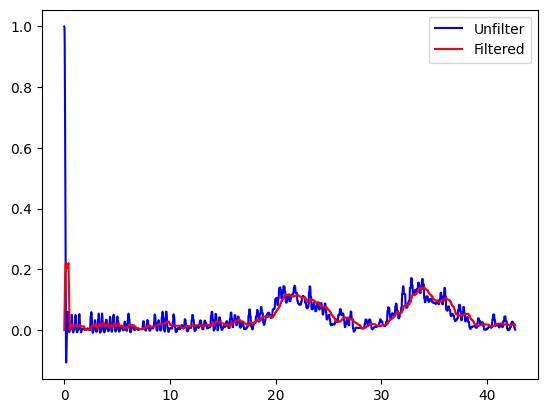

In [206]:
time = []
voltage = []

with open("n6/n6_4.csv") as csvfile:
    read_data = csv.reader(csvfile, delimiter=',')
    for row in read_data:
        time.append(float(row[0]))
        voltage.append(float(row[1]))
time = time[:]
voltage = voltage[:]

n = 10000
b = [1.0 / n] * n
a = 1
v_filter = lfilter(b, a, voltage)

fig, ax = plt.subplots()
ax.plot(time, voltage, 'b', label="Unfilter")
ax.plot(time, v_filter, 'r', label="Filtered")
ax.legend()

## Mesurements

In [207]:
t1 = get_time(v_filter, time, 5, 15)
t2 = get_time(v_filter, time, 20, 30)
t_diff = t2 - t1
w_diff = t_diff * 0.08740
print(f"t1 = {t1}, t2 = {t2} \nThe diff in time is {t_diff} \nThe different in wavelength = {w_diff} A")

t1 = 9.814204, t2 = 21.264492 
The diff in time is 11.450288 
The different in wavelength = 1.0007551712 A


## Statistical Data

#### Doublet

In [214]:
T_diff = [6.8635, 6.8632, 6.8753, 6.8617, 6.8660]
W_diff = [0, 0, 0, 0, 0]
df1 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print(df1)
df1.describe().loc[["count", "mean", "std", "min", "max"]]

   t_dff(s)  wavelength_diff(A)
0    6.8635                   0
1    6.8632                   0
2    6.8753                   0
3    6.8617                   0
4    6.8660                   0


,t_dff(s),wavelength_diff(A)
count,5.000000,5.0
mean,6.865940,0.0
std,0.005456,0.0
min,6.861700,0.0
max,6.875300,0.0


#### n_i = 3

In [215]:
T_diff = [20.076, 20.425, 21.095, 20.272, 20.669]
W_diff = [1.8420, 1.7851, 1.8437, 1.7718, 1.8064]
df2 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 3")
print(df2)
df2.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 3
   t_dff(s)  wavelength_diff(A)
0    20.076              1.8420
1    20.425              1.7851
2    21.095              1.8437
3    20.272              1.7718
4    20.669              1.8064


,t_dff(s),wavelength_diff(A)
count,5.000000,5.000000
mean,20.507400,1.809800
std,0.393604,0.032603
min,20.076000,1.771800
max,21.095000,1.843700


#### n_i = 4

In [216]:
T_diff = [14.924, 15.001, 14.908, 13.733, 13.906]
W_diff = [1.3043, 1.3119, 1.3029, 1.2003, 1.2154]
df2 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 4")
print(df2)
df2.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 4
   t_dff(s)  wavelength_diff(A)
0    14.924              1.3043
1    15.001              1.3119
2    14.908              1.3029
3    13.733              1.2003
4    13.906              1.2154


,t_dff(s),wavelength_diff(A)
count,5.000000,5.000000
mean,14.494400,1.266960
std,0.620123,0.054331
min,13.733000,1.200300
max,15.001000,1.311900


#### n_i = 5

In [217]:
T_diff = [12.816, 13.507, 12.536, 12.432, 13.456]
W_diff = [1.1201, 1.1805, 1.0956, 1.0866, 1.1760]
df2 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 5")
print(df2)
df2.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 5
   t_dff(s)  wavelength_diff(A)
0    12.816              1.1201
1    13.507              1.1805
2    12.536              1.0956
3    12.432              1.0866
4    13.456              1.1760


,t_dff(s),wavelength_diff(A)
count,5.000000,5.000000
mean,12.949400,1.131760
std,0.505954,0.044203
min,12.432000,1.086600
max,13.507000,1.180500


#### n_i = 6

In [218]:
T_diff = [12.430, 13.982, 13.476, 12.768, 11.809]
W_diff = [1.0864, 1.2220, 1.1778, 1.1159, 1.0321]
df2 = pd.DataFrame({"t_dff(s)": T_diff, "wavelength_diff(A)": W_diff})
print("n_i = 6")
print(df2)
df2.describe().loc[["count", "mean", "std", "min", "max"]]

n_i = 6
   t_dff(s)  wavelength_diff(A)
0    12.430              1.0864
1    13.982              1.2220
2    13.476              1.1778
3    12.768              1.1159
4    11.809              1.0321


,t_dff(s),wavelength_diff(A)
count,5.000000,5.000000
mean,12.893000,1.126840
std,0.855988,0.074805
min,11.809000,1.032100
max,13.982000,1.222000


In [220]:
s1 = 20
s2 = 30
s3 = 20

f1 = 10
f2 = 15
f3 = 20

def s_prime(s, f, n):
    s_prime = 1/(1/f - 1/s)
    m = - s_prime / s
    print("The magnification for {n}th lense is {m}")
    return s_prime, m

def s(s, s_prime):
    return s - s_prime
    
s_prime(s(s3, s_prime(s(s2, s_prime(s1, f1)), f2)), f3)

33.333333333333336